## 3-6. 군집화

### 1. 군집화(Clustering)
- 유사한 성질 을 가진 데이터 포인트들끼리 자동으로 묶어 주는 작업

$𝑋={𝐱_𝟏, …,𝐱_𝒏}⊂𝑹^𝒅$

$\cup_{𝑘=1}^𝐾C_k=𝑋, 𝐶_i\cap C_𝑗=∅(𝑖≠𝑗)$

각 데이터 포인트는 반드시 하나의 클러스터에만 속함

유사한 성질 $\Rightarrow$ 거리(Distance)

### 2. 거리 

#### 두 데이터 포인트의 차이를 수치화한 값
- 거리의 성질
| 성질 | 내용 |
| --- | --- |
| 비음성성 |$𝑑(𝑥,𝑦)≥0$|
| 동일성 |$𝑑(𝑥,𝑦)=0⇔𝑥=𝑦$|
| 대칭성 |$𝑑(𝑥,𝑦)=𝑑(𝑦,𝑥)$|
| 삼각부등식 | $𝑑(𝑥,𝑧)≤𝑑(𝑥,𝑦)+𝑑(𝑦,𝑧)$|
- 거리가 작을수록: 두 데이터 포인트는 유사함
- 거리가 클수록: 두 데이터 포인트는 차이가 남

#### 거리 척도(Metric)

- 범주형
| 거리 | 거리 함수 | 비고 |
| --- | --- | --- |
| 해밍 거리<br/>(Hamming Distance)| $d(\mathbf{x}, \mathbf{y}) = \sum_{i=1}^{n} I(x_i \neq y_i)$ | $I(i) = \begin{cases} if\ i가\ True, 1 \\ if\ i가\ False, 0 \end{cases}$ |
|자카드 거리<br/>(Jaccard Distance) |$d(X, Y) = 1 - \frac{\vert X \cap Y \vert}{\vert X \cup Y \vert}$ | 다중 변수에서 사용 |


- 연속형

| 거리 | 함수 | 비고 |
|---|---|---|
| 유클리디언 거리<br>(Euclidean Distance) | $d(\mathbf{x}, \mathbf{y}) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}$ | |
| 맨하탄 거리<br>(Manhattan Distance) | $d(\mathbf{x}, \mathbf{y}) = \sum_{i=1}^{n} \vert x_i - y_i \vert$ | |
| 민코프스키 거리<br>(Minkowski Distance) | $d(\mathbf{x}, \mathbf{y}) = \left( \sum_{i=1}^{n} \vert x_i - y_i \vert^p \right)^{1/p}$ | p=1 : 맨하탄 거리<br>p=2 : 유클리디언 거리 |
| 코사인 거리<br>(Cosine Distance) | $d(\mathbf{x}, \mathbf{y}) = 1 - \frac{\mathbf{x} \cdot \mathbf{y}}{\|\mathbf{x}\|_2 \|\mathbf{y}\|_2}$ | 코사인유사도 : $\frac{\mathbf{x} \cdot \mathbf{y}}{\|\mathbf{x}\|_2 \|\mathbf{y}\|_2}$ |
| 마할라노비스 거리<br>(Mahalanobis Distance) | $d(\mathbf{x}, \mathbf{y}) = \sqrt{(\mathbf{x} - \mathbf{y})^T \Sigma^{-1} (\mathbf{x} - \mathbf{y})}$ | $\Sigma$ : 공분산행렬 |

- 코사인 거리(Cosine Distance)

> $d(\mathbf{x}, \mathbf{y}) = 1 - \frac{\mathbf{x} \cdot \mathbf{y}}{\|\mathbf{x}\|_2 \|\mathbf{y}\|_2}$ 
>
> 벡터 간 방향만 비교하는 거리
> 
> 거리의 요건 중 삼각 부등식을 만족하지 않아 정확하게는 거리는 아님
> 
> 벡터의 스케일에 영향을 받지 않음
> 
> 고차원 희소 벡터에 적합


- 마할라노비스 거리(Mahalanobis Distance)
> $d(\mathbf{x}, \mathbf{y}) = \sqrt{(\mathbf{x} - \mathbf{y})^T \Sigma^{-1} (\mathbf{x} - \mathbf{y})}$
> 
> 각 변수의 분산과 상관관계를 반영하여 거리 계산

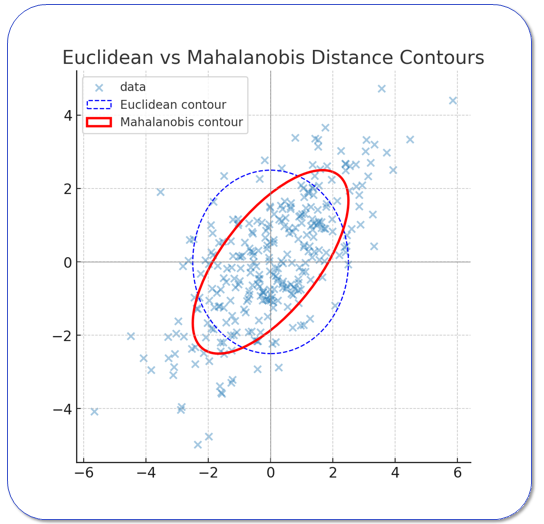

### 3. K-Means 군집화

- k 개의 중심점을 기준으로, 각 데이터 포인트를 가장 가까운 중심점에 할당하여 군집을 형성하는 방법

$\mathbf{\mu}(𝑐𝑒𝑛𝑡𝑟𝑜𝑖𝑑)=\{\mathbf{\mu}_𝟏, \mathbf{\mu}_𝟐, …\mathbf{\mu}_𝒌\}$

$𝑐_𝑖=argmin_𝑘||\mathbf{𝐱}_𝐢−\mathbf{\mu}_k||^2$



#### 학습 $\mathbf{\mu}(𝑐𝑒𝑛𝑡𝑟𝑜𝑖𝑑)=\{\mathbf{\mu}_𝟏, \mathbf{\mu}_𝟐, …\mathbf{\mu}_𝒌\}$

- 알고리즘
1. 중심점($\mathbf{\mu}$) 초기화
2. 군집 할당
3. 중심점 갱신 단계
> 중심점의 갱신 단계는
> $\text{𝐼𝑛𝑒𝑟𝑡𝑖𝑎}=\sum_{𝑘=1}^𝐾\sum_{𝑖∈𝐶}||\mathbf{x}_i−\mathbf{\mu}_𝒌||^2$ 을 낮추도록 되어 있음
4. 종료 조건이 충족될 때까지, 2 번 이동
> 중심점 갱신횟수 최대 도달 여부
> 
> 응집도(Inertia) 감소 임계점 ...

- 지역 최적점(Local Optima)이 다수 존재

> Greedy 알고리즘이므로 초기 중심점에 따라 결과가 다름
$\Rightarrow$ 다수의 수행 중에서 가장 좋은 응집도(Inertia)의 결과 채택


### 4. K-Medoids 군집화

- 데이터 포인트들 중에서 선택된 k 개의 대표점(medoid)을 기준으로, 가장 가까운 대표점의 군집으로 할당하는 군집화 방법

$\mathbf{m}(𝑐𝑒𝑛𝑡𝑟𝑜𝑖𝑑)=\{\mathbf{m}_𝟏, \mathbf{m}_𝟐, …\mathbf{m}_𝒌\}$

$𝑐_𝑖=argmin_𝑘distance(\mathbf{𝐱}_𝐢−\mathbf{m}_k)$

- k-means 는 유클리디언 거리만 사용하지만
- k-medoids 는 거리 척도 선택 가능



#### 학습 $\mathbf{m}=\{\mathbf{m}_1, \mathbf{m}_2, ..., \mathbf{m}_2\}$

- 알고리즘
1. 대표점($m$) 초기화
2. 군집 할당
> $𝐶_𝑘=\{𝐱_𝑖│𝑑𝑖𝑠𝑡𝑎𝑛𝑐𝑒(𝐱_𝐢,𝐦_𝒌)⁡\le𝑑𝑖𝑠𝑡𝑎𝑛𝑐𝑒(𝐱_𝐢,𝒎_𝒋),\forall j\}$
3. 대표점 갱신 단계 $\mathbf{m}_k = \underset{\mathbf{x}_j \in C_k}{\text{argmin}} \sum_{\mathbf{x}_i \in C_k} distance(\mathbf{x}_i, \mathbf{x}_j)$
> $\text{TotalCost}=\sum_{𝑘=1}^𝐾\sum_{𝑖∈𝐶} distance(\mathbf{x}_i, \mathbf{\mu}_𝒌)$ 를 낮추는 것이 목표
4. 종료 조건이 충족될 때까지, 2 번 이동
> 대표점 갱신횟수 최대 도달 여부
> 
> 거리감소 임계점, ...

- 지역 최적점(Local Optima)이 다수 존재

> Greedy 알고리즘이므로 초기 중심점에 따라 결과가 다름
$\Rightarrow$ 다수의 수행 중에서 가장 좋은 TotalCost의 결과 채택


### 5. 가우시안 혼합 모델(Gaussian Mixture Model)

- 군집을 나타내는 가우시안 확률 분포와 가장 큰 밀도를 지닌 군집에 할당하는 군집화 방법

$𝐆𝐌𝐌=\{(𝜋_1,𝛍_1,𝚺_1),(𝜋_2,𝛍_2,𝚺_2), …,(𝜋_𝐾,𝛍_𝐾,𝚺_𝐾)\}$

$c_i = \underset{k \in GMM}{\text{argmax}} \frac{\pi_k N(\mathbf{x}_i | \boldsymbol{\mu}_k, \Sigma_k)}{\sum_{j=1}^{K} \pi_j N(\mathbf{x}_i | \boldsymbol{\mu}_j, \Sigma_j)}$

확률 밀도: $𝑝(\mathbf{𝐱})=\sum_{𝑘=1}^𝐾\pi_𝑘𝑁(𝐱|𝛍_𝑘,𝚺_𝑘)$

#### 다변량 가우시안 분포

$N(\mathbf{x}|\boldsymbol{\mu}, \Sigma) = \frac{1}{(2\pi)^{d/2}|\Sigma|^{1/2}} \cdot \exp\left(-\frac{1}{2}(\mathbf{x} - \boldsymbol{\mu})^{\mathsf{T}}\Sigma^{-1}(\mathbf{x} - \boldsymbol{\mu})\right)$

$\mathbf{x} \in R^d$ $\boldsymbol{\mu}_k \in R^d$:평균 벡터 $\Sigma_k \in R^{d \times d}$:공분산 행렬

#### 학습: 기대값 최대화(Expectation-Maximization) 알고리즘

$\theta = \{\theta_1, \theta_2, ..., \theta_k\} = \{(\pi_1, \boldsymbol{\mu}_1, \Sigma_1), (\pi_2, \boldsymbol{\mu}_2, \Sigma_2), ..., (\pi_K, \boldsymbol{\mu}_K, \Sigma_K)\}$ Where, $\sum_{k=1}^{K} \pi_k = 1$

> $p(Z = k)=\pi_k$
>
> $p(X = \mathbf{x}|Z = k) \sim N(\mathbf{\mu}_k, \mathbf{\Sigma_1})$

- 기대값(Expectation) $Q(\theta'|\theta) = E_{Z|X,\theta}[\log p(X, Z|\theta')]$

> $\mathbf{x}_i$가 서로 독립이라고 가정
>
> $Q(\theta'|\theta) = \sum_{i=1}^{N} \sum_{k=1}^{K} p(Z_i = k|X = \mathbf{x}_i, \theta) \log p(X = \mathbf{x}_i, Z_i = k|\theta')$
>
> $p(Z_i = k|X = \mathbf{x}_i, \theta) = \frac{P(Z_i = k, X = \mathbf{x}_i|\theta)}{P(X = \mathbf{x}_i|\theta)} = \frac{P(X = \mathbf{x}_i|Z_i = k, \theta)P(Z_i = k|\theta)}{\sum_{j=1}^{K} P(X = \mathbf{x}_i|Z_i = j, \theta)P(Z_i = j|\theta)} = \frac{\pi_k N(\mathbf{x}_i|\boldsymbol{\mu}_k, \Sigma_k)}{\sum_{j=1}^{K} \pi_j N(\mathbf{x}_i|\boldsymbol{\mu}_j, \Sigma_j)}$
> 
> $p(X = \mathbf{x}_i, Z_i = k|\theta') = p(X = \mathbf{x}_i|Z_i = k, \theta')p(Z_i = k|\theta') = \pi_k' N(\mathbf{x}_i|\boldsymbol{\mu}_k', \Sigma_k')$


- 최대화(Maximization)

> $\pi_k' = \underset{\pi_k'}{\text{argmax}} Q(\theta'|\theta)$ Where $\sum_{k=1}^{K} \pi_k' = 1$ | $\boldsymbol{\mu}_k' = \underset{\boldsymbol{\mu}_k'}{\text{argmax}} Q(\theta'|\theta)$ | $\Sigma_k' = \underset{\Sigma_k'}{\text{argmax}} Q(\theta'|\theta)$
>
> $\pi_k' = \frac{1}{N} \sum_{i=1}^{N} \gamma_{ik}$ | $\boldsymbol{\mu}_k' = \frac{\sum_{i=1}^{N} \gamma_{ik} \mathbf{x}_i}{\sum_{i=1}^{N} \gamma_{ik}}$ | $\Sigma_k' = \frac{\sum_{i=1}^{N} \gamma_{ik} (\mathbf{x}_i - \boldsymbol{\mu}_k)(\mathbf{x}_i - \boldsymbol{\mu}_k)^T}{\sum_{i=1}^{N} \gamma_{ik}}$

### 6. 군집수의 선택
#### 팔꿈치 방법(Elbow Method)
- 손실(우도)이 감소(증가)하다가 완만해지는 지점이 팔꿈치(Elbow)
- 꺾이는 지점의 군집수 선택

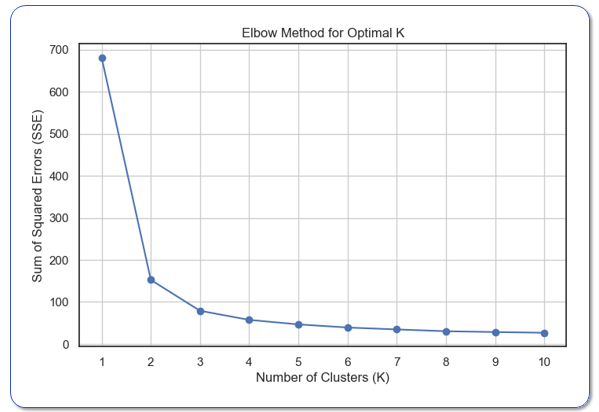

#### 실루엣 방법(Silhouette method)


- 실루엣 점수가 가장 높은 K 선택
- 하지만 실제 군집수와 불일치하는 경우가 많아 시각화나 도메인 지식 등을 함께 보고 결정

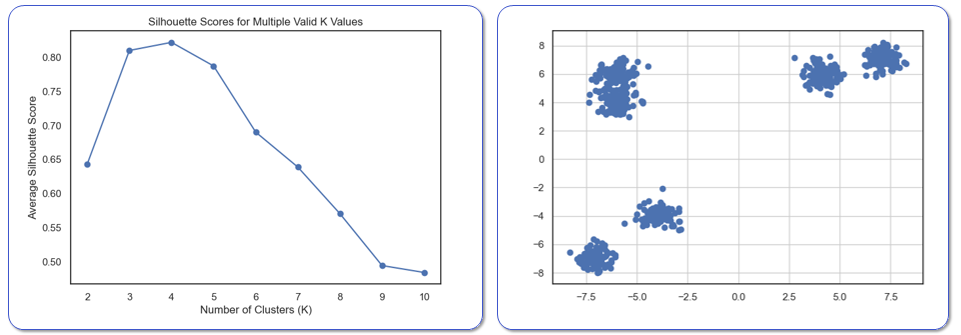

### 7. 계층적 군집화(Hierarchical Clustering)
- 군집 간의 유사도를 기반으로 군집을 결합 또는 분할하여 계층 구조의 군집을 형성하는 군집화 방법

|방법| 설명 |
| --- | --- |
| 병합형<br/>(Agglomerative) | Bottom-Up 방식 |
| 분할형<br/>(Divisive) | Top-Down 방식 |

▷ 실무에선 대부분 병합형(Agglomerative) 계층적 군집화 를 사용


#### 학습 방법: 병합형
- 1. 모든 데이터 포인트들을 하나의 군집으로 할당
- 2. 군집 간 결합 기준값(Linkage) 계산
- 4. 기준값이 최소인 두 군집을 결합
- 3. (최소 결합 기준값이 임계치를 넘었을 경우 종료)
- 5. 목표 군집수에 도달할 때 까지 2 부터 반복

| Linkage 방식 | 군집 A, B |
|---|---|
| Single | $\underset{a_i \in A, b_i \in B}{\min} \quad dist(a_i, b_i)$ |
| Complete | $\underset{a_i \in A, b_i \in B}{\max} \quad dist(a_i, b_i)$ |
| Average | $\frac{1}{|A| \times |B|} \sum_{a_i \in A, b_i \in B} dist(a_i, b_i)$ |
| Ward | $SSE(A \cup B) - SSE(A) - SSE(B)$ |

####  계층적 군집화 시각화(Dendrogram)

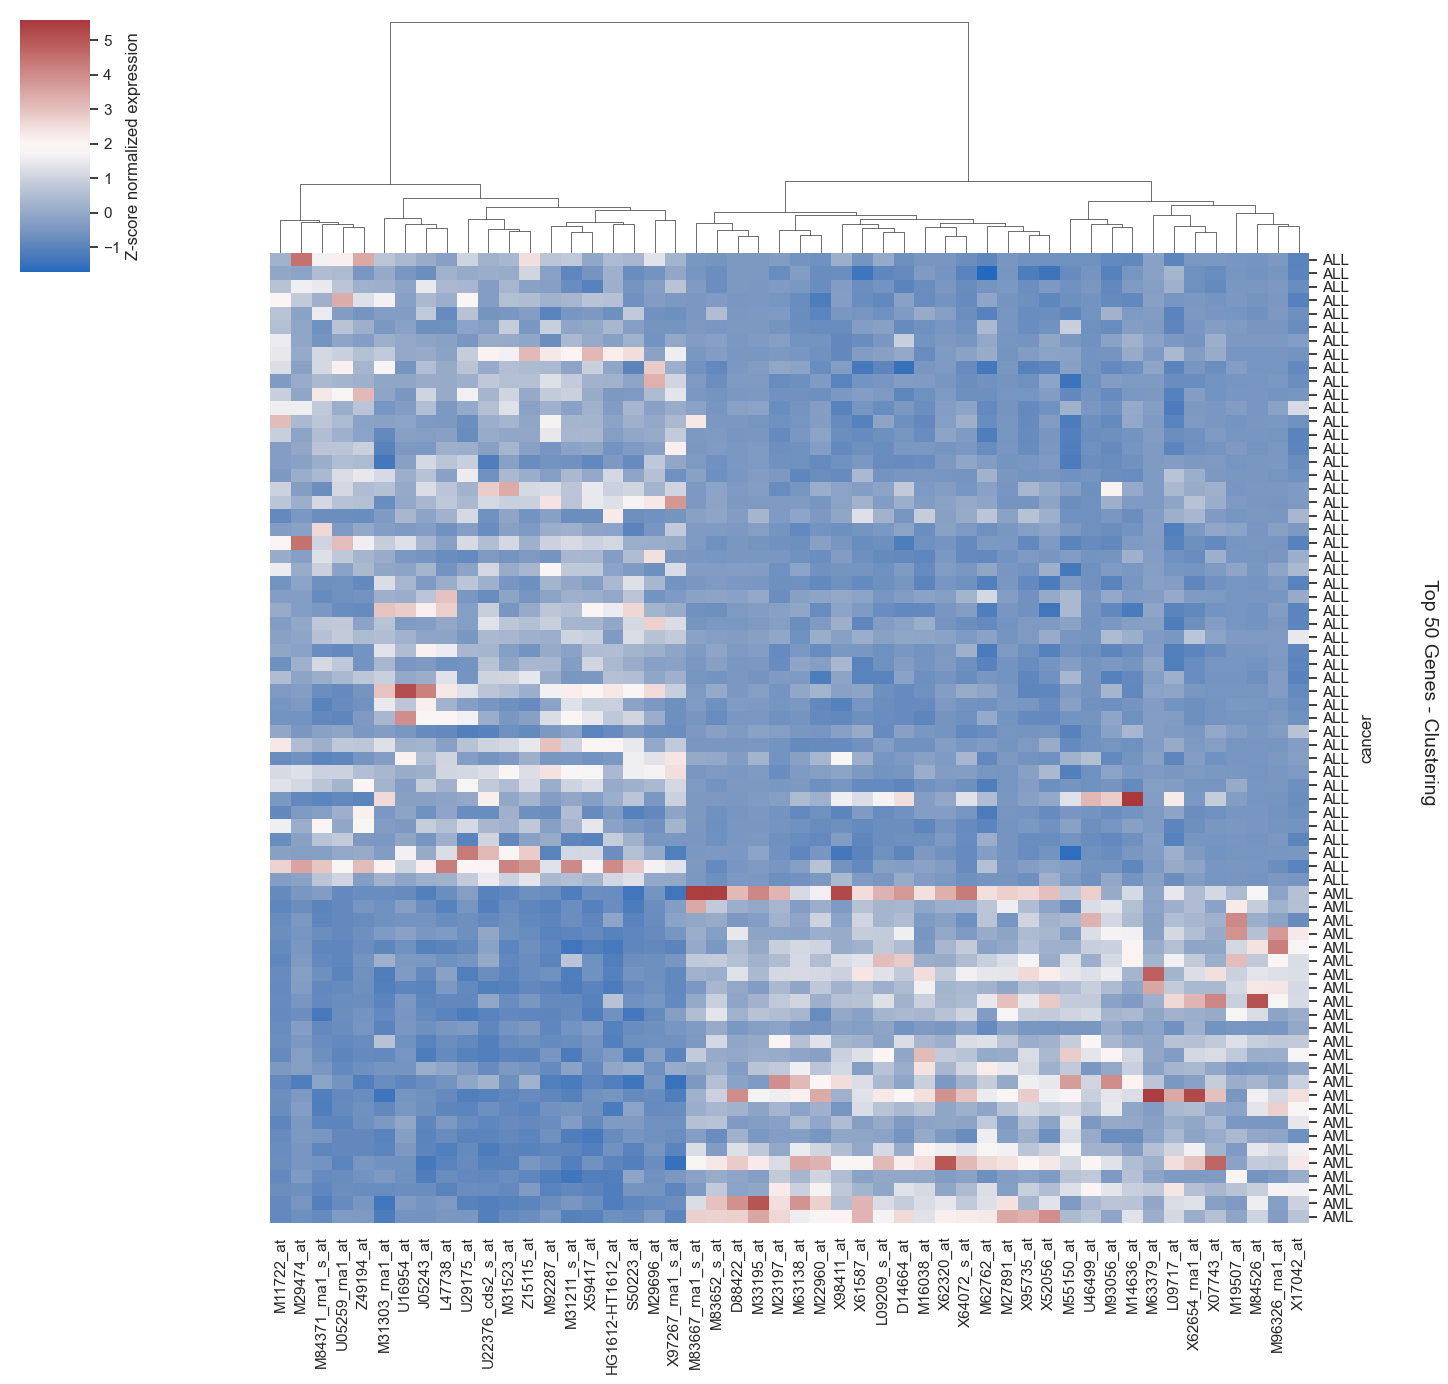

### 8. DBSCAN
- 입실론 반경(Epsilon Radius): 이웃이 되기 위한 최소 반경
- 중심점 최소 이웃 수: 중심점이 되기 위한 최소 이웃의 수

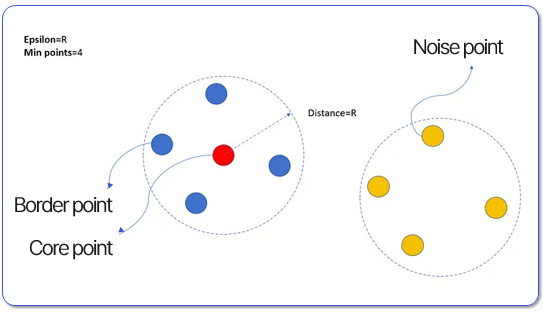

|   | 설명 |
| --- | --- |
| 중심점<br/>Core point | 입실론 반경 내의 이웃수가 중심점 최소 이웃수를 넘는 데이터 포인트 |
| 경계점<br/>Border point | 중심점 최소 이웃수는 넘지 않지만 중심점의 입실론 반경 내에 있는 데이터 포인트 |
| 잡음점<br/>Noise point | 중심점 과 경계점에 해당되지 않는 데이터 포인트 |


#### 학습 방법

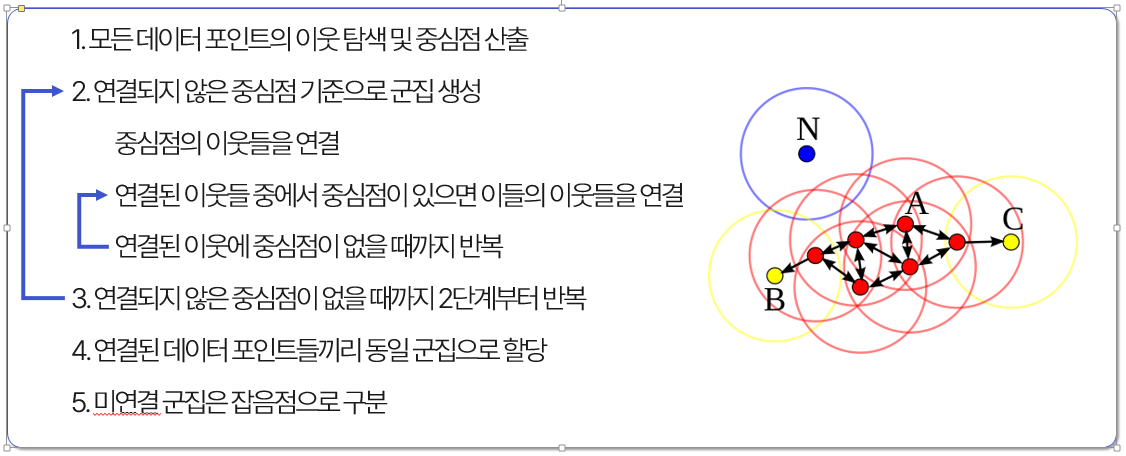
- 출처: https://en.wikipedia.org/wiki/DBSCAN

### 9. 정리

|   | 주요 특징 | 장점 | 단점 |
| --- | --- | --- | --- |
| K-means | 중심 기반 분할(Centroid-Based)<br/>유클리드 거리 사용<br/>구형 클러스터 가정 | 빠른 계산 속도<br/>간단한 구현 | 클러스터 수 지정 필요<br/>이상치에 민감<br>비구형 클러스터에는 부적합 |
| K-medoids | 중심이 실제 데이터 포인트<br/>거리 기반 | 이상치에 덜 민감<br/>다양한 거리 측정 가능 | 계산 비용이 큼<br/>클러스터 수 지정 필요 |
| 가우시안 혼합 모델<br/>(GMM) | 확률 기반 혼합 모델<br/>각 클러스터를 가우시안 분포로 가정 | 클러스터가 타원형일 때 효과적 | 초기값에 민감<br/>클러스터 수 지정 필요<br/>계산 복잡도가 높음 |
| 계층적 군집화 | 트리 형태로 구조 해석 가능 | 클러스터의 수를 미리 정할 필요 없음 | 계산 비용이 큼 |
| DBSCAN | 밀도 기반 클러스터링<br/>이상치 자동 감지<br/>클러스터 수 자동 결정 | 이상치를 감지할 수 있음<br/>복잡한 모양의 클러스터에 강함 | 밀도 파라미터 설정이 어려움<br/>밀도가 불균형한 데이터에 부적합 |


#### 군집화 결과 비교

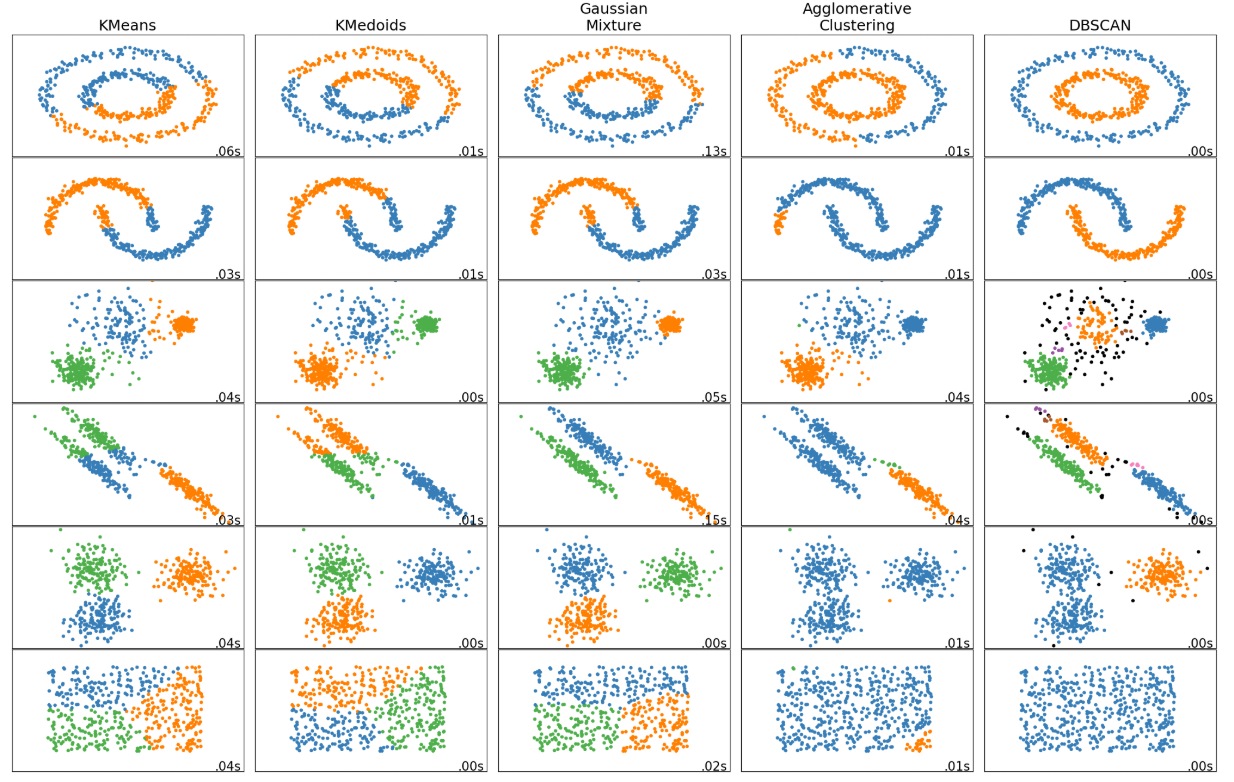